

# Problem ​Description 

When​ a​ ​consumer​ ​places​ ​an​ ​order​ ​on​ DoorDash,​​ we​ ​ show​ ​ the​ ​ ​expected ​
​time of​​ ​delivery.​ ​It​ ​is​ ​very ​important​ ​for​ DoorDash to get this right, as it has a big impact on consumer experience. In this exercise, you will build a model to predict the
estimated time taken for a delivery and write an application that can
make these predictions.



In [2]:
import seaborn as sns
import pandas as pd
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt

In [4]:
import os
current_directory = os.getcwd()
print(current_directory) 

c:\Users\Harish Vasanth\Desktop\Machine-learning-projects\DeliveryPredictionModel


In [72]:
df = pd.read_csv('data/historical_data.csv')
df.head(4)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0


market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
actual_time_taken                                   7
date                                                7
dtype: int64

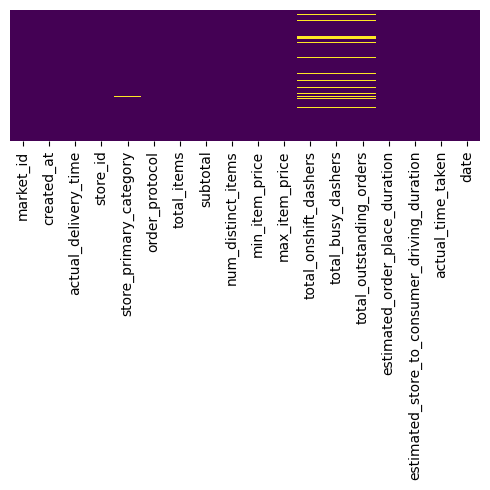

In [34]:
# checking for NA values
fig, ax = plt.subplots(figsize=(5,5))   
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
df.isna().sum()


In [35]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

draw_missing_data_table(df)

,Total,Percent
total_onshift_dashers,16262,0.082369
total_outstanding_orders,16262,0.082369
total_busy_dashers,16262,0.082369
store_primary_category,4760,0.024110
order_protocol,995,0.005040
market_id,987,0.004999
estimated_store_to_consumer_driving_duration,526,0.002664
actual_time_taken,7,0.000035
date,7,0.000035
actual_delivery_time,7,0.000035


In [7]:
df.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [8]:
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_time_taken'] = df['actual_delivery_time']-df['created_at']
df['date'] = pd.to_datetime(df['actual_delivery_time']).dt.date
df['actual_time_taken'] = df['actual_time_taken']/ pd.offsets.Minute(1)

<Axes: title={'center': 'Markets'}, xlabel='market_id'>

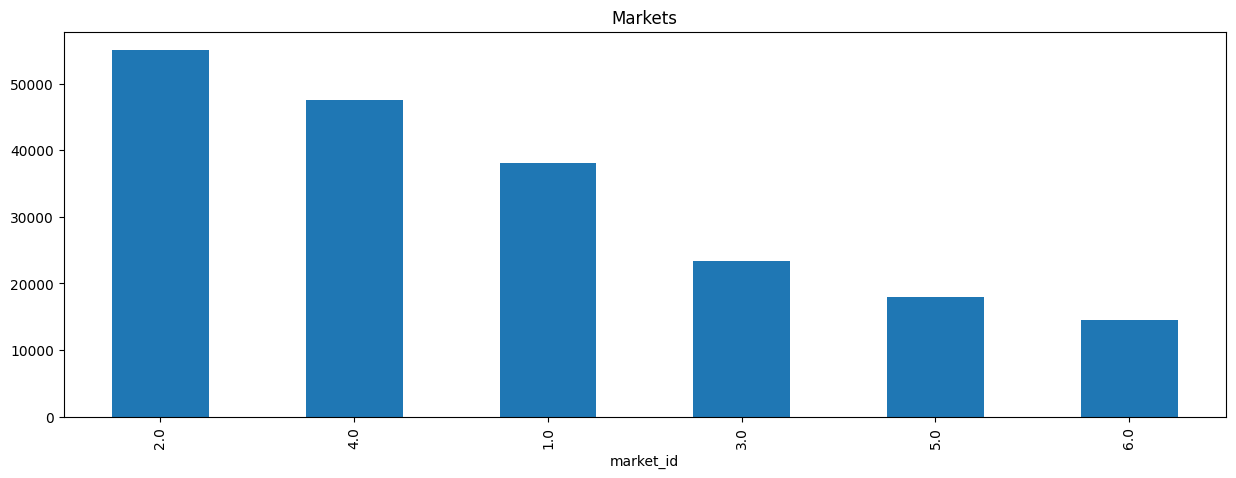

In [9]:

df.market_id.value_counts().plot.bar(figsize=(15,5), title='Markets')

In [10]:
df.store_id.value_counts().shape,  ## See how many stores they have. Seems too many.Might be better to take location instead.

((6743,),)

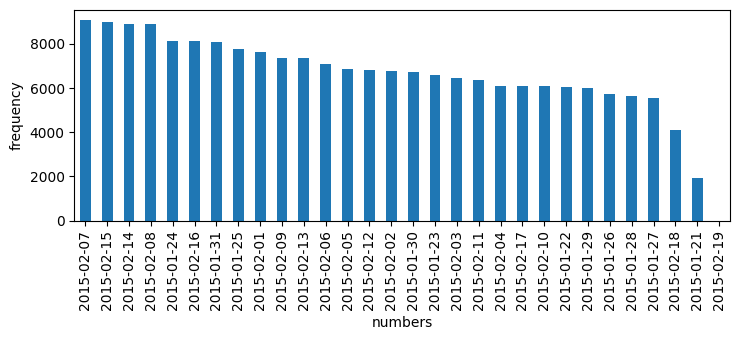

In [12]:


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df['date'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')

plt.show()

<Axes: title={'center': 'Store primary category'}, xlabel='store_primary_category'>

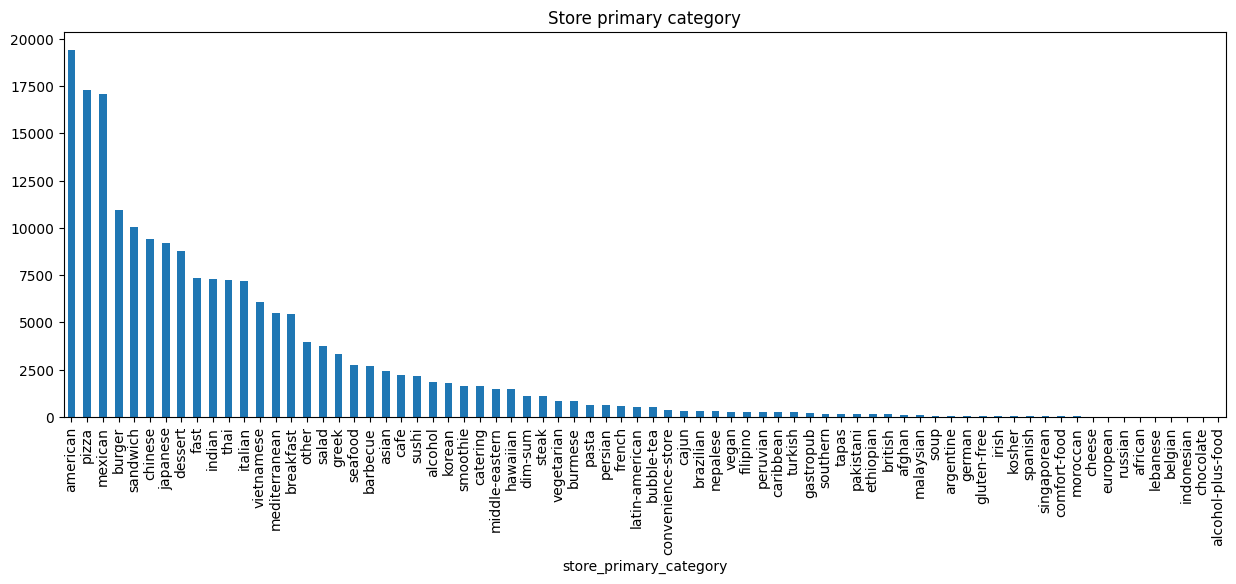

In [11]:
df.store_primary_category.value_counts().plot.bar(figsize=(15,5), title='Store primary category')

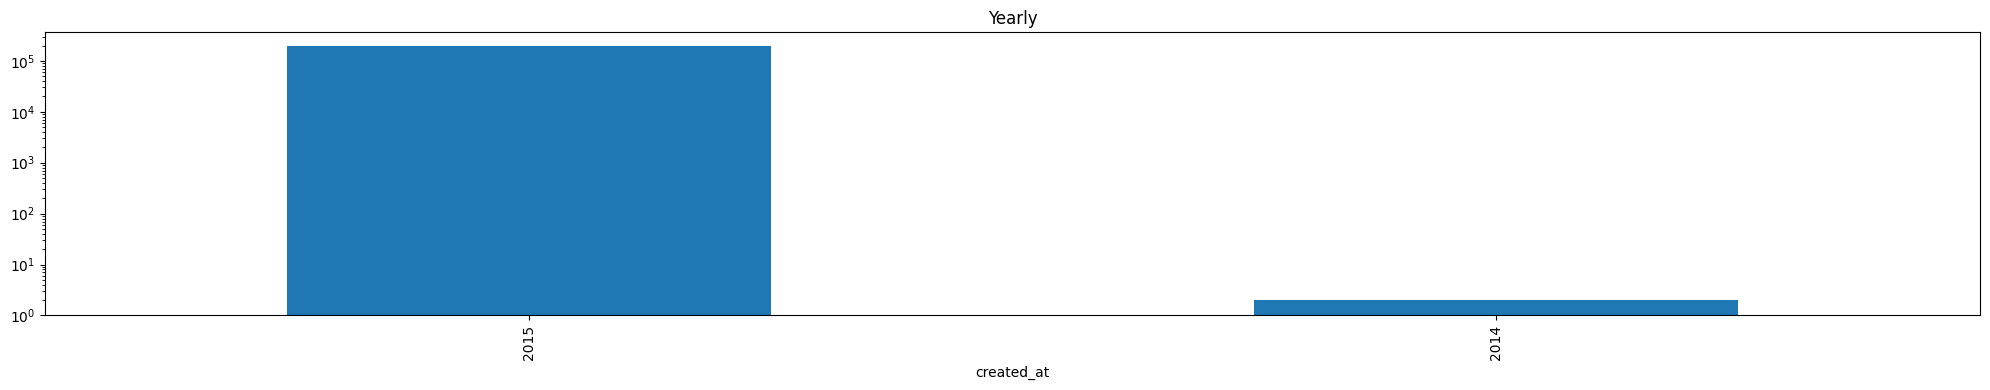

In [13]:
df.created_at.dt.year.value_counts().plot.bar(figsize=(20, 4), title='Yearly', log=True);

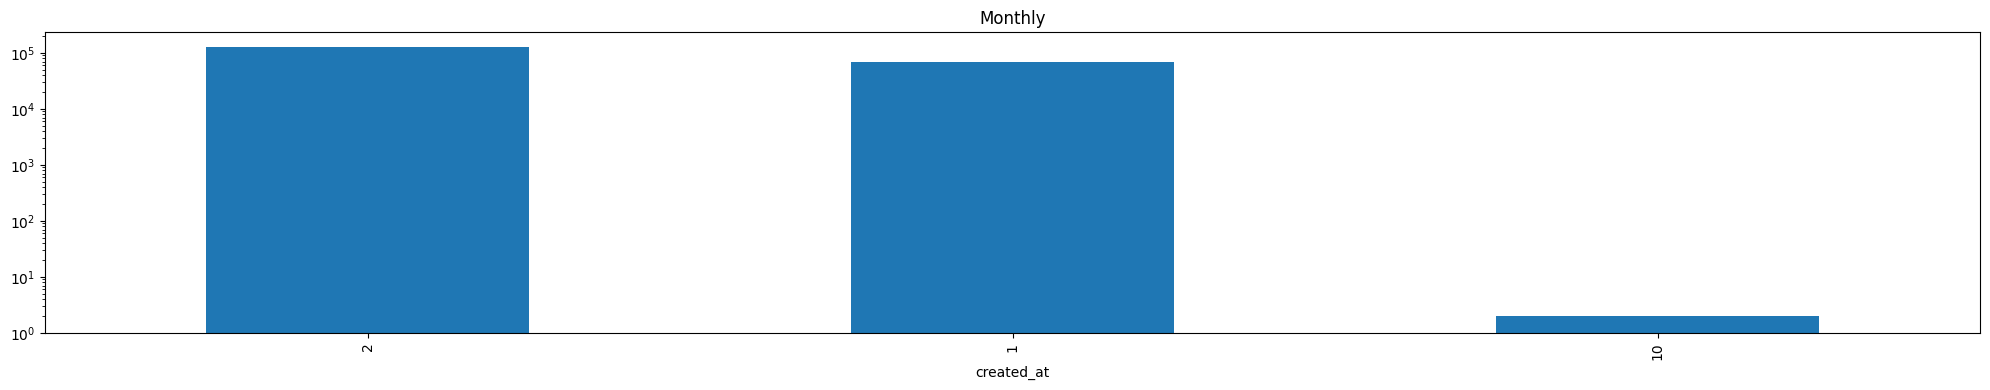

In [14]:
df.created_at.dt.month.value_counts().plot.bar(figsize=(20, 4), title='Monthly', log=True);

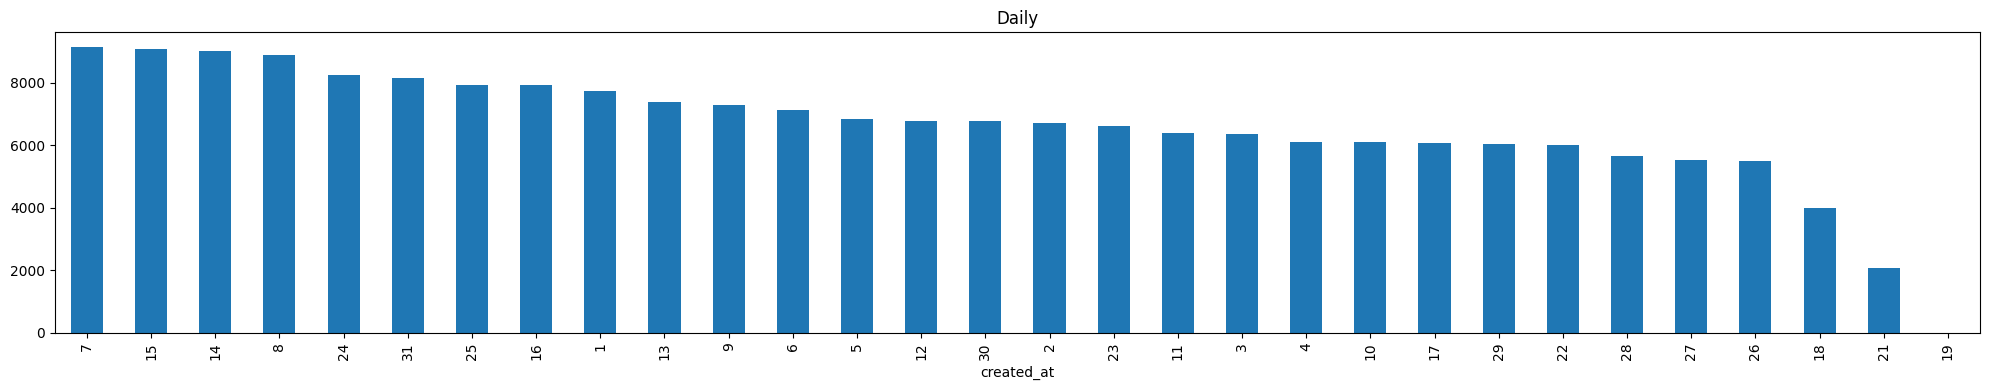

In [15]:
df.created_at.dt.day.value_counts().plot.bar(figsize=(20, 4), title='Daily');

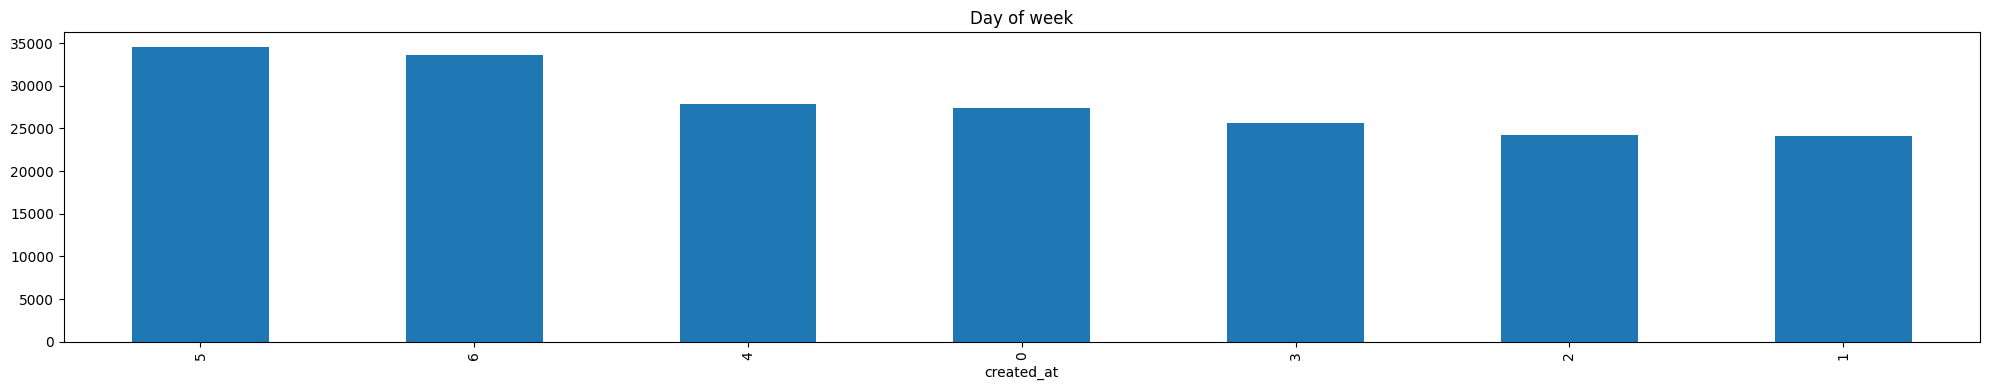

In [16]:
df.created_at.dt.dayofweek.value_counts().plot.bar(figsize=(20, 4), title='Day of week');

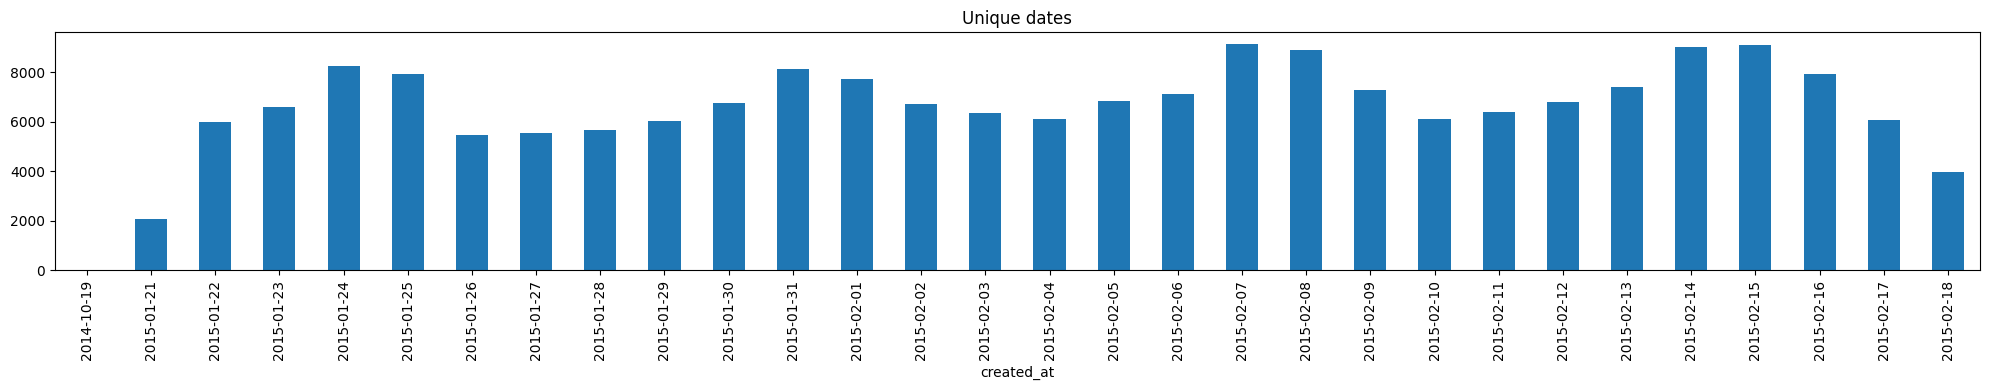

In [17]:
df.created_at.dt.date.value_counts().sort_index().plot.bar(figsize=(20, 4), title='Unique dates');

In [28]:
from pandas.tseries.holiday import USFederalHolidayCalendar as cal


Holidays in range (2014-10-19 - 2015-02-18):
 2014-11-11                           Veterans Day
2014-11-27                       Thanksgiving Day
2014-12-25                          Christmas Day
2015-01-01                         New Year's Day
2015-01-19    Birthday of Martin Luther King, Jr.
2015-02-16                  Washington’s Birthday
dtype: object


<Axes: title={'center': 'In holidays'}, xlabel='created_at'>

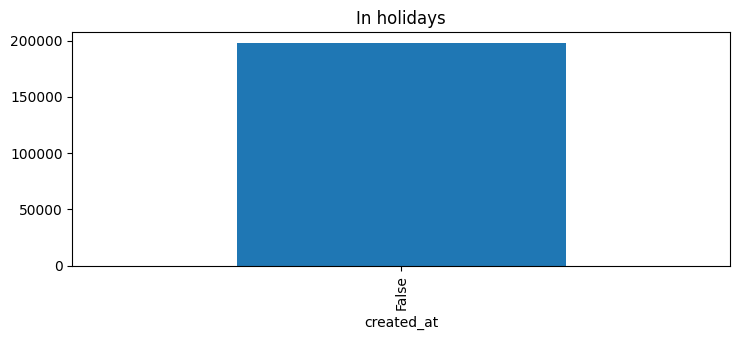

In [29]:
import calendar
start = df.created_at.dt.date.min()
end = df.created_at.dt.date.max()
holidays = cal().holidays(start=start, end=end, return_name=True)
print(f'Holidays in range ({start} - {end}):\n', holidays)
df.created_at.isin(holidays.index).value_counts().plot.bar(title='In holidays')

In [56]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken,date
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,62.983333,2015-02-06
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,67.066667,2015-02-10
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,29.683333,2015-01-22
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,51.250000,2015-02-03
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,39.833333,2015-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,65.116667,2015-02-17
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,56.383333,2015-02-13
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,50.133333,2015-01-24
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,65.116667,2015-02-01


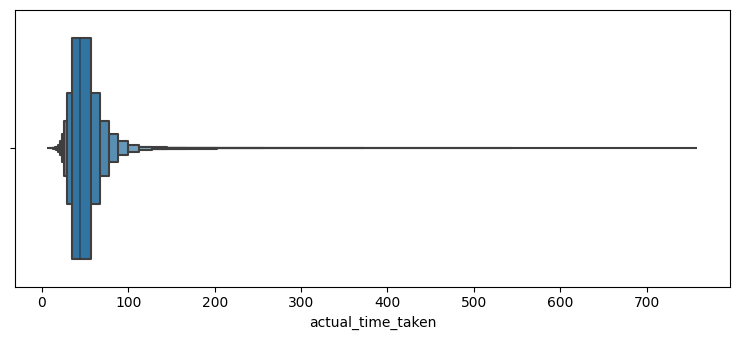

In [63]:
sns.boxenplot(x = 'actual_time_taken', data = df, showfliers = False)
plt.show() # this is without the extreme outliers

<Axes: ylabel='Frequency'>

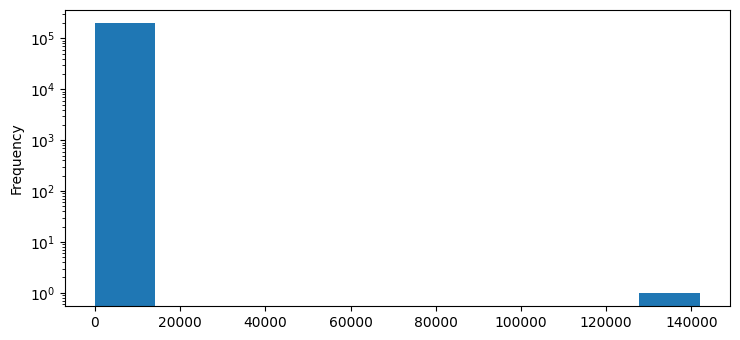

In [67]:
df.actual_time_taken.plot.hist(bins=10, log=True)

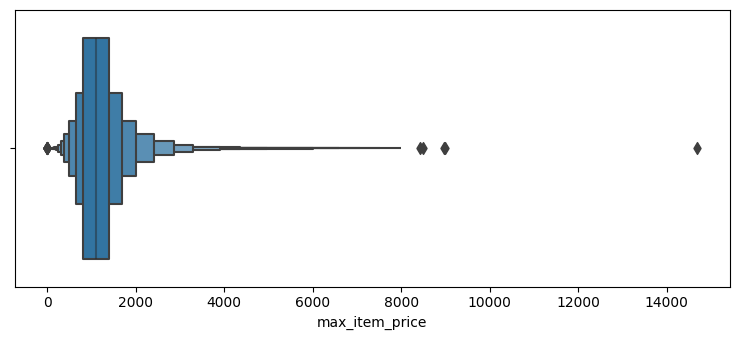

In [69]:
sns.boxenplot(x = 'max_item_price', data = df, showfliers = True)
plt.show()

<Axes: ylabel='Frequency'>

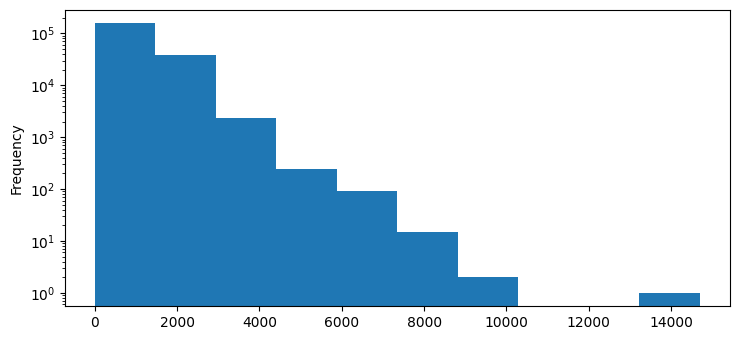

In [70]:
df.max_item_price.plot.hist(bins=10, log=True)

Overall analysis - 

We probably have to remove certain outliers when it comes to max price and time taken.
Since there is a lot of calendar and numerical data, we need to conduct feature extraction on that.
